In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from figure import plots

# Dataset info

In [8]:
tlist = pd.read_csv('./Dataset/target_list.tsv', sep='\t', index_col='chembl_tid')

tlist['threshold'] = 0
for tname in tlist.index:
    df    = pd.read_csv('./Dataset/Data/%s.tsv'%tname, sep='\t', index_col=0)
    thres = df['thres'].iloc[0]
    tlist.loc[tname, 'thres'] = thres
    
tlist = tlist.loc[tlist['predictable_trtssplit']]

In [9]:
tlist.head()

,Unnamed: 0,entry,entry_name,protein_names,protein_families,organism,ec_number,gene_names(primary),gene_ontology(molecular_function),primary_name,#mmp,#mms,machine1,machine2,predictable_trtssplit,threshold,thres
chembl_tid,,,,,,,,,,,,,,,,,
CHEMBL244,0,P00742,FA10_HUMAN,Coagulation factor X (EC 3.4.21.6) (Stuart fac...,Peptidase S1 family,Homo sapiens (Human),3.4.21.6,F10,calcium ion binding [GO:0005509]; phospholipid...,Coagulation factor X,3283,213,True,False,True,0,2.274817
CHEMBL204,1,P00734,THRB_HUMAN,Prothrombin (EC 3.4.21.5) (Coagulation factor ...,Peptidase S1 family,Homo sapiens (Human),3.4.21.5,F2,calcium ion binding [GO:0005509]; growth facto...,Prothrombin,2179,115,False,True,True,0,2.164973
CHEMBL3594,2,Q16790,CAH9_HUMAN,Carbonic anhydrase 9 (EC 4.2.1.1) (Carbonate d...,Alpha-carbonic anhydrase family,Homo sapiens (Human),4.2.1.1,CA9,carbonate dehydratase activity [GO:0004089]; h...,Carbonic anhydrase 9,2108,278,True,False,True,0,1.706915
CHEMBL261,3,P00915,CAH1_HUMAN,Carbonic anhydrase 1 (EC 4.2.1.1) (Carbonate d...,Alpha-carbonic anhydrase family,Homo sapiens (Human),4.2.1.1,CA1,arylesterase activity [GO:0004064]; carbonate ...,Carbonic anhydrase 1,2091,304,False,True,True,0,1.865207
CHEMBL205,4,P00918,CAH2_HUMAN,Carbonic anhydrase 2 (EC 4.2.1.1) (Carbonate d...,Alpha-carbonic anhydrase family,Homo sapiens (Human),4.2.1.1,CA2,arylesterase activity [GO:0004064]; carbonate ...,Carbonic anhydrase 2,2091,309,True,False,True,0,1.795089


/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


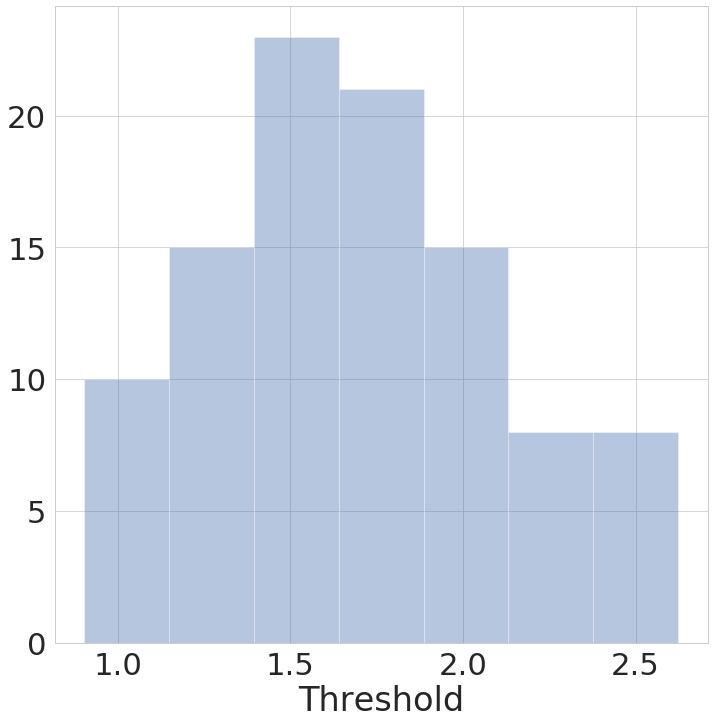

In [10]:
plots.makeHistogramSeaborn(pd_table  = tlist,
                           xname     = 'thres',
                           hue_col   = None,
                           normalize = False,
                           label_name= 'Threshold'
                           )

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


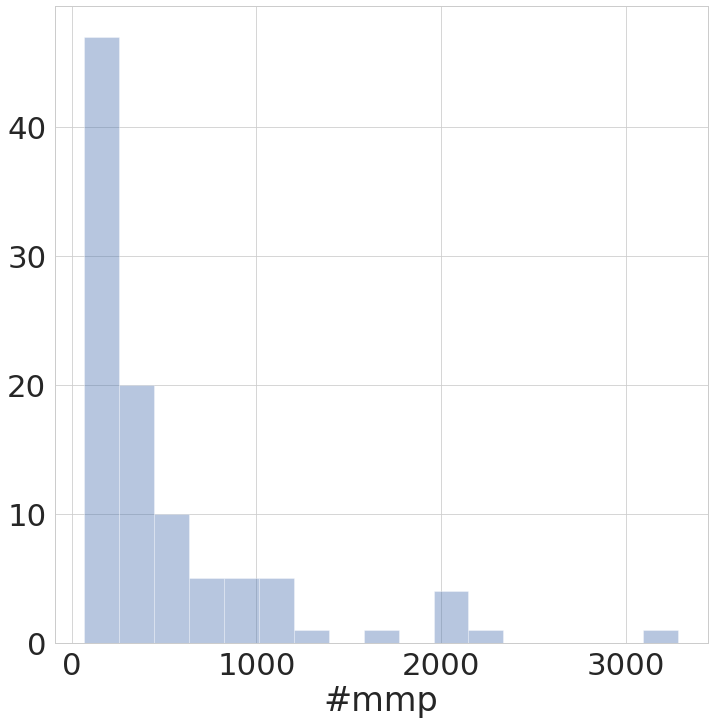

In [11]:
plots.makeHistogramSeaborn(pd_table  = tlist,
                           xname     = '#mmp',
                           hue_col   = None,
                           normalize = False,
                           )

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


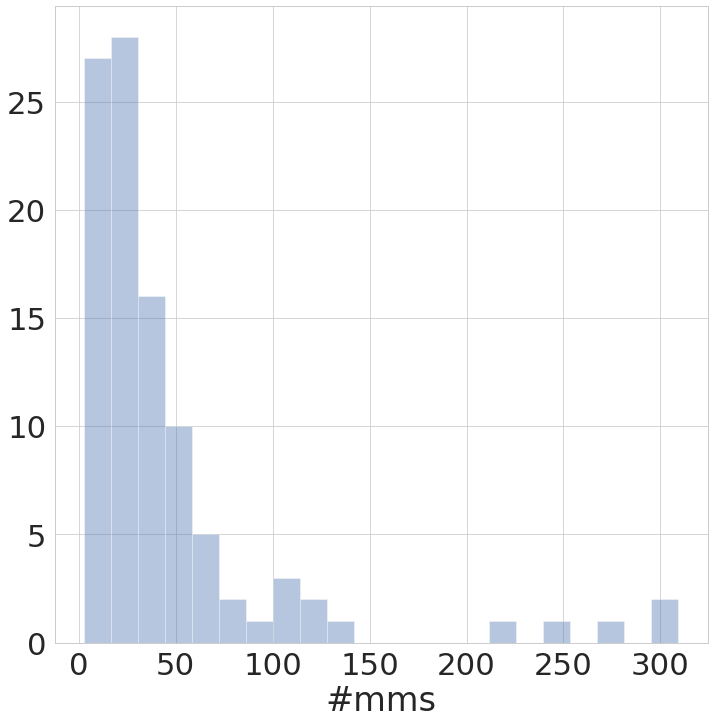

In [12]:
plots.makeHistogramSeaborn(pd_table  = tlist,
                           xname     = '#mms',
                           hue_col   = None,
                           normalize = False,
                           )

In [13]:
svm = pd.read_csv('./Score_wodirection_trtssplit/SVM/mean.tsv', sep='\t', index_col=0)
xgb = pd.read_csv('./Score_wodirection_trtssplit/XGBoost/mean.tsv', sep='\t', index_col=0)
rf  = pd.read_csv('./Score_wodirection_trtssplit/Random_Forest/mean.tsv', sep='\t', index_col=0)
fcn = pd.read_csv('./Score_wodirection_trtssplit/FCNN/mean.tsv', sep='\t', index_col=0)
mpn = pd.read_csv('./Score_wodirection_trtssplit/MPNN/mean.tsv', sep='\t', index_col=0)

svm['model'] = 'svm'
xgb['model'] = 'xgb'
rf['model']  = 'rf'
fcn['model'] = 'fcn'
mpn['model'] = 'mpn'

all_score = pd.concat([svm, xgb, rf, fcn, mpn])

In [14]:
all_score.head()

,accuracy,precision,recall,f1,auc_roc,matthews_coeff,#tr,#ac_tr,accuracy_var,precision_var,recall_var,f1_var,auc_roc_var,matthews_coeff_var,#tr_var,#ac_tr_var,model
CHEMBL244,0.970,0.777,0.791,0.781,0.978,0.766,2298.0,155.0,0.0,0.007,0.002,0.001,0.000,0.001,0.0,0.0,svm
CHEMBL204,0.979,0.817,0.915,0.862,0.987,0.853,1525.0,110.0,0.0,0.000,0.006,0.001,0.000,0.002,0.0,0.0,svm
CHEMBL3594,0.943,0.582,0.563,0.572,0.914,0.542,1475.0,99.0,0.0,0.014,0.003,0.008,0.000,0.009,0.0,0.0,svm
CHEMBL261,0.949,0.602,0.650,0.623,0.944,0.598,1463.0,97.0,0.0,0.004,0.010,0.005,0.001,0.006,0.0,0.0,svm
CHEMBL205,0.920,0.437,0.597,0.504,0.884,0.469,1463.0,100.0,0.0,0.000,0.002,0.001,0.000,0.001,0.0,0.0,svm


/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 91.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


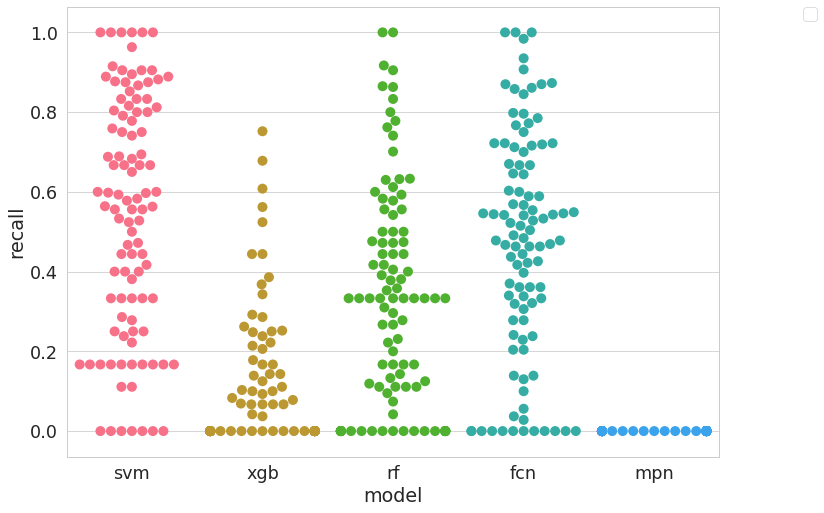

In [15]:
plots.MakeBoxPlotsSeaborn(table     = all_score,
                          xname     = 'model',
                          yname     = 'recall',
                          use_swarm = True,
                          )

In [16]:
import seaborn as sns
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

color_col = '#tr'

#Create a matplotlib colormap from the sns seagreen color palette
cmap    = sns.light_palette("blue", reverse=False, as_cmap=True )
# Normalize to the range of possible values from df["c"]
norm = matplotlib.colors.Normalize(vmin=all_score[color_col].min(), vmax=all_score[color_col].max())
# create a color dictionary (value in c : color from colormap) 
colors = {}
for cval in all_score[color_col]:
    colors.update({cval : cmap(norm(cval))})

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 91.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


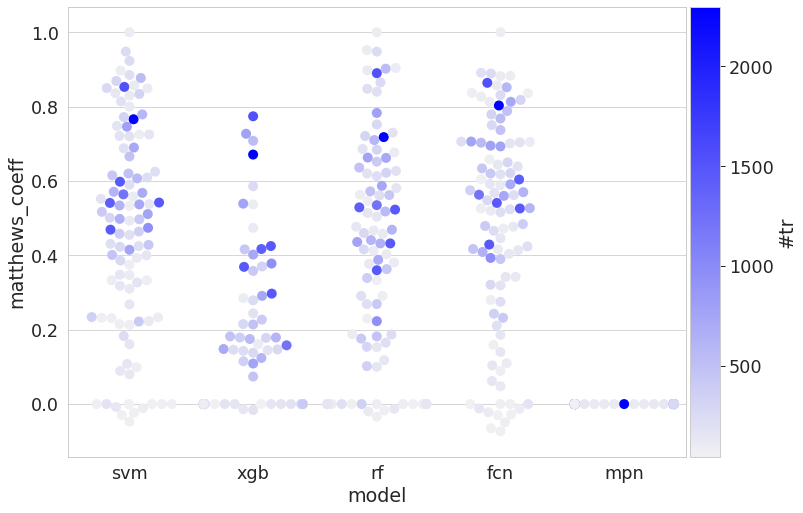

In [17]:
sns.set(font_scale=2.0, context='paper', style='whitegrid')
margin  = 0.15 # bottom margin
fig, ax = plt.subplots(figsize=(11.7, 8.27))

ax      = sns.swarmplot(x='model', y='matthews_coeff', hue=color_col, data=all_score, ax=ax, size=2.0*5, palette=colors)
plt.gca().legend_.remove()

## create colorbar ##
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
fig.add_axes(ax_cb)
cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, 
                                       cmap = cmap,
                                       norm = norm,
                                       orientation = 'vertical')
cb1.set_label(color_col)


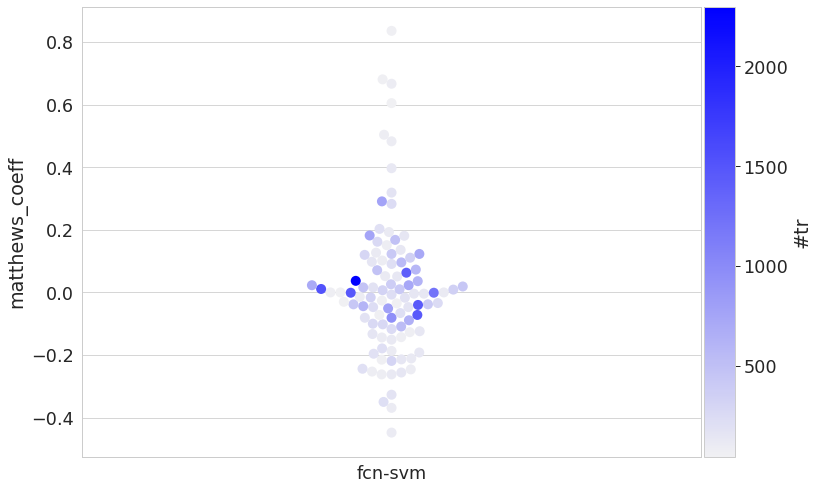

In [18]:
d_mcc_fcn_svm = fcn['matthews_coeff'] - svm['matthews_coeff']


sns.set(font_scale=2.0, context='paper', style='whitegrid')
margin  = 0.15 # bottom margin
fig, ax = plt.subplots(figsize=(11.7, 8.27))

ax      = sns.swarmplot(x=['fcn-svm']*svm.shape[0], y=d_mcc_fcn_svm, hue=fcn[color_col], data=None, ax=ax, size=2.0*5, palette=colors)
plt.gca().legend_.remove()

## create colorbar ##
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
fig.add_axes(ax_cb)
cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, 
                                       cmap = cmap,
                                       norm = norm,
                                       orientation = 'vertical')
cb1.set_label(color_col)

In [19]:
import plotly.express as px
import plotly.io as pio


In [30]:
fcn_sort = fcn.sort_values(['matthews_coeff'], ascending=False)
fcn_sort.head(10)

,accuracy,precision,recall,f1,auc_roc,matthews_coeff,#tr,#ac_tr,accuracy_var,precision_var,recall_var,f1_var,auc_roc_var,matthews_coeff_var,#tr_var,#ac_tr_var,model
CHEMBL3018,1.000,1.000,1.000,1.000,1.000,1.000,94.0,8.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,fcn
CHEMBL4072,0.985,0.864,0.935,0.897,0.967,0.891,200.0,15.0,0.0,0.000,0.003,0.001,0.001,0.001,0.0,0.0,fcn
CHEMBL1800,0.987,0.921,0.873,0.895,0.914,0.889,252.0,15.0,0.0,0.005,0.001,0.001,0.001,0.001,0.0,0.0,fcn
CHEMBL5407,0.977,0.800,1.000,0.889,0.994,0.883,99.0,10.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,fcn
CHEMBL1741186,0.984,0.922,0.861,0.890,0.996,0.882,117.0,10.0,0.0,0.005,0.016,0.010,0.000,0.012,0.0,0.0,fcn
CHEMBL204,0.982,0.902,0.845,0.872,0.966,0.864,1525.0,110.0,0.0,0.000,0.001,0.000,0.000,0.000,0.0,0.0,fcn
CHEMBL1926488,0.980,0.750,1.000,0.857,0.984,0.857,116.0,8.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,fcn
CHEMBL255,0.990,0.847,0.870,0.855,0.991,0.852,588.0,22.0,0.0,0.001,0.013,0.002,0.000,0.002,0.0,0.0,fcn
CHEMBL1795117,0.976,0.831,0.870,0.849,0.911,0.837,90.0,8.0,0.0,0.023,0.013,0.017,0.006,0.020,0.0,0.0,fcn
CHEMBL4361,0.986,1.000,0.722,0.822,0.869,0.836,63.0,4.0,0.0,0.000,0.065,0.028,0.013,0.023,0.0,0.0,fcn


In [21]:
all_score['#tr'] = all_score['#tr'].astype(int)
    
px.strip(data_frame = all_score,
         x          = 'model',
         y          = 'matthews_coeff',
         hover_name = list(all_score.index),
         height     = 300,
         width      = 600,
         #color      = '#tr',
        )

In [22]:
px.strip(data_frame = None,
         x          = ['d_fcn-svm']*svm.shape[0],
         y          = d_mcc_fcn_svm,
         hover_name = list(svm.index),
         height     = 600,
         width      = 600,
         #color      = '#tr',
        )

In [23]:
fcn.sort_values('matthews_coeff', ascending=False)

,accuracy,precision,recall,f1,auc_roc,matthews_coeff,#tr,#ac_tr,accuracy_var,precision_var,recall_var,f1_var,auc_roc_var,matthews_coeff_var,#tr_var,#ac_tr_var,model
CHEMBL3018,1.000,1.000,1.000,1.000,1.000,1.000,94.0,8.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,fcn
CHEMBL4072,0.985,0.864,0.935,0.897,0.967,0.891,200.0,15.0,0.000,0.000,0.003,0.001,0.001,0.001,0.0,0.0,fcn
CHEMBL1800,0.987,0.921,0.873,0.895,0.914,0.889,252.0,15.0,0.000,0.005,0.001,0.001,0.001,0.001,0.0,0.0,fcn
CHEMBL5407,0.977,0.800,1.000,0.889,0.994,0.883,99.0,10.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,fcn
CHEMBL1741186,0.984,0.922,0.861,0.890,0.996,0.882,117.0,10.0,0.000,0.005,0.016,0.010,0.000,0.012,0.0,0.0,fcn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL2079846,0.924,0.000,0.000,0.000,0.812,-0.028,79.0,4.0,0.000,0.000,0.000,0.000,0.009,0.001,0.0,0.0,fcn
CHEMBL208,0.927,0.000,0.000,0.000,0.786,-0.030,51.0,3.0,0.001,0.000,0.000,0.000,0.012,0.001,0.0,0.0,fcn
CHEMBL235,0.904,0.000,0.000,0.000,0.848,-0.049,83.0,3.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,fcn
CHEMBL203,0.873,0.000,0.000,0.000,0.706,-0.065,48.0,3.0,0.001,0.000,0.000,0.000,0.033,0.000,0.0,0.0,fcn


In [24]:
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [25]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

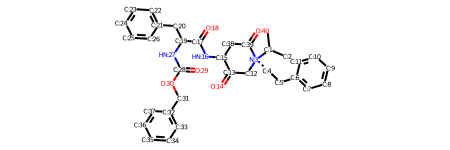

In [26]:
smi = 'CC(C)N1(~CCc2ccccc2)CC(=O)C(NC(=O)C(Cc2ccccc2)NC(=O)OCc2ccccc2)CC1=O'
mol_with_atom_index(Chem.MolFromSmiles(smi))